<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:28: SyntaxWarning: invalid escape sequence '\l'
/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_12878/3732451374.py:28: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Poisson Process with $\lambda$ = {}'.format(lambda_rate))


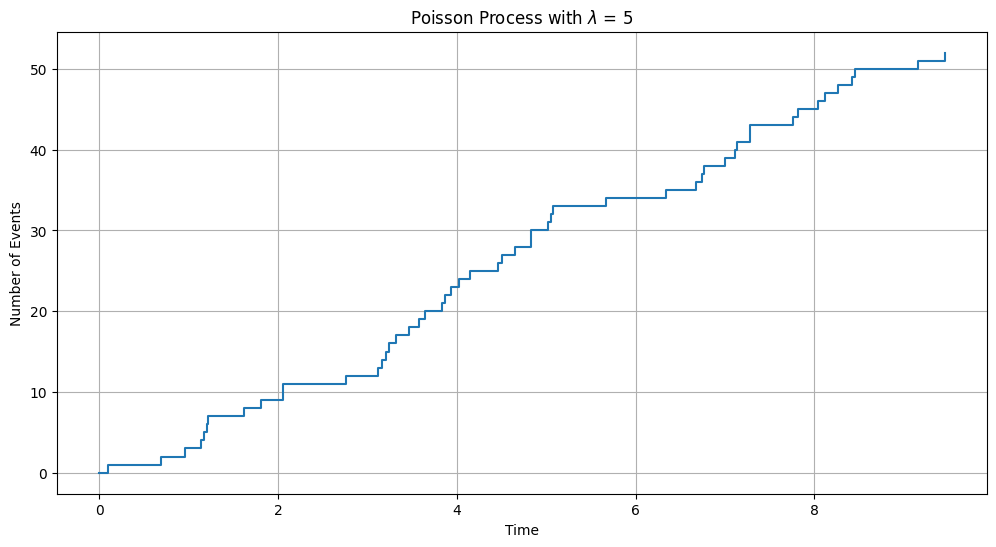

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 5  # Rate of the Poisson process (events per time unit)
time_horizon = 10  # Total time for the simulation

# Simulate the Poisson process
np.random.seed(42)  # For reproducibility
event_times = []
current_time = 0

while current_time < time_horizon:
    # Time until the next event
    inter_event_time = np.random.exponential(1 / lambda_rate)
    current_time += inter_event_time
    if current_time < time_horizon:
        event_times.append(current_time)

# Convert to NumPy array for convenience
event_times = np.array(event_times)

# Plotting
plt.figure(figsize=(12, 6))
plt.step(np.concatenate([[0], event_times]), np.arange(len(event_times) + 1), where='post')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.title('Poisson Process with $\lambda$ = {}'.format(lambda_rate))
plt.grid(True)
plt.show()


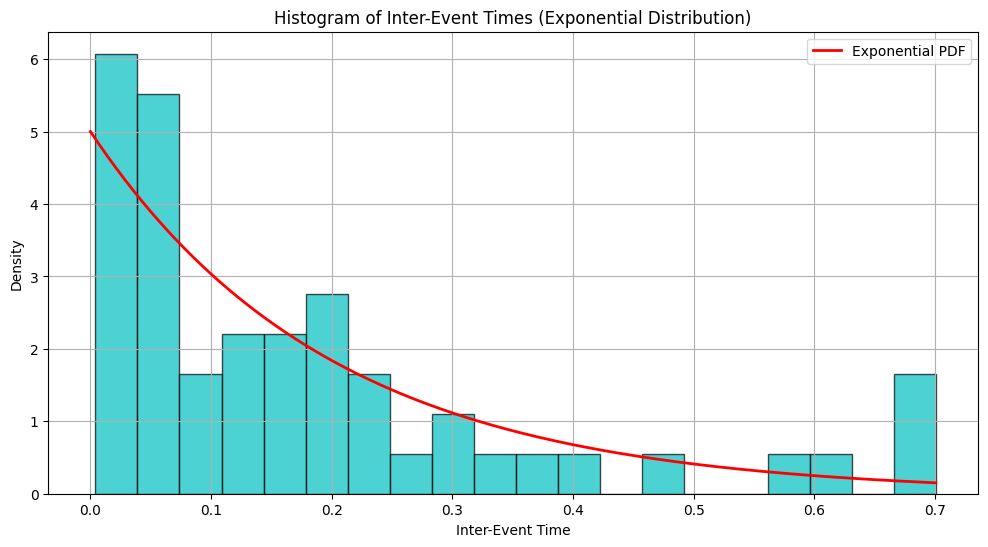

In [2]:
# Calculate inter-event times
inter_event_times = np.diff(np.concatenate([[0], event_times]))

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(inter_event_times, bins=20, density=True, alpha=0.7, color='c', edgecolor='black')
plt.xlabel('Inter-Event Time')
plt.ylabel('Density')
plt.title('Histogram of Inter-Event Times (Exponential Distribution)')
plt.grid(True)

# Plot exponential PDF for comparison
x = np.linspace(0, max(inter_event_times), 1000)
plt.plot(x, lambda_rate * np.exp(-lambda_rate * x), 'r-', lw=2, label='Exponential PDF')
plt.legend()
plt.show()


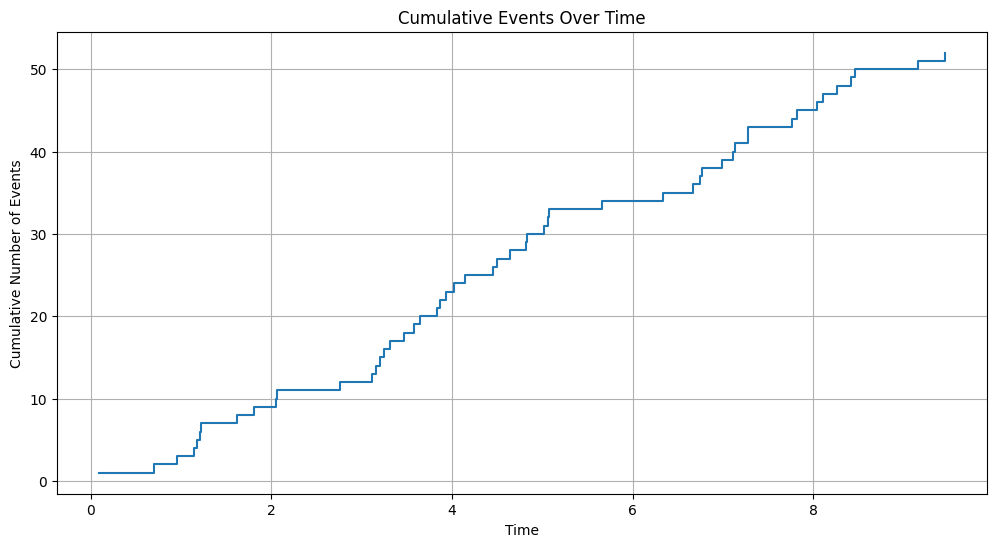

In [3]:
# Cumulative count of events
cumulative_events = np.arange(1, len(event_times) + 1)

# Plot cumulative events
plt.figure(figsize=(12, 6))
plt.plot(event_times, cumulative_events, drawstyle='steps-post')
plt.xlabel('Time')
plt.ylabel('Cumulative Number of Events')
plt.title('Cumulative Events Over Time')
plt.grid(True)
plt.show()


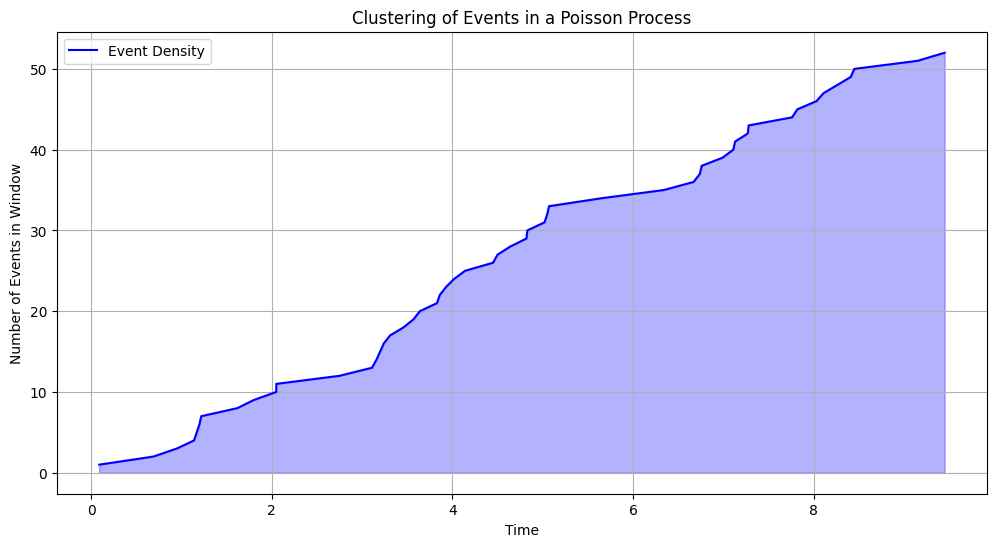

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
lambda_rate = 5  # Rate of the Poisson process (events per time unit)
time_horizon = 10  # Total time for the simulation
window_size = 1.0  # Window size for clustering analysis (can be converted to an integer index)

# Simulate the Poisson process
np.random.seed(42)  # For reproducibility
event_times = []
current_time = 0

while current_time < time_horizon:
    # Time until the next event
    inter_event_time = np.random.exponential(1 / lambda_rate)
    current_time += inter_event_time
    if current_time < time_horizon:
        event_times.append(current_time)

# Convert to NumPy array for convenience
event_times = np.array(event_times)

# Convert the window size to an integer based on the data
# For example, if we assume 100 time units as the time resolution, scale the window size
resolution = 100
integer_window_size = int(window_size * resolution)

# Calculate event density using a rolling window
time_series = pd.Series(np.ones_like(event_times), index=(event_times * resolution).astype(int))
rolling_density = time_series.rolling(window=integer_window_size, min_periods=1).sum()

# Plotting the clustering of events
plt.figure(figsize=(12, 6))
plt.plot(rolling_density.index / resolution, rolling_density.values, label='Event Density', color='b')
plt.xlabel('Time')
plt.ylabel('Number of Events in Window')
plt.title('Clustering of Events in a Poisson Process')
plt.fill_between(rolling_density.index / resolution, 0, rolling_density.values, color='b', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()


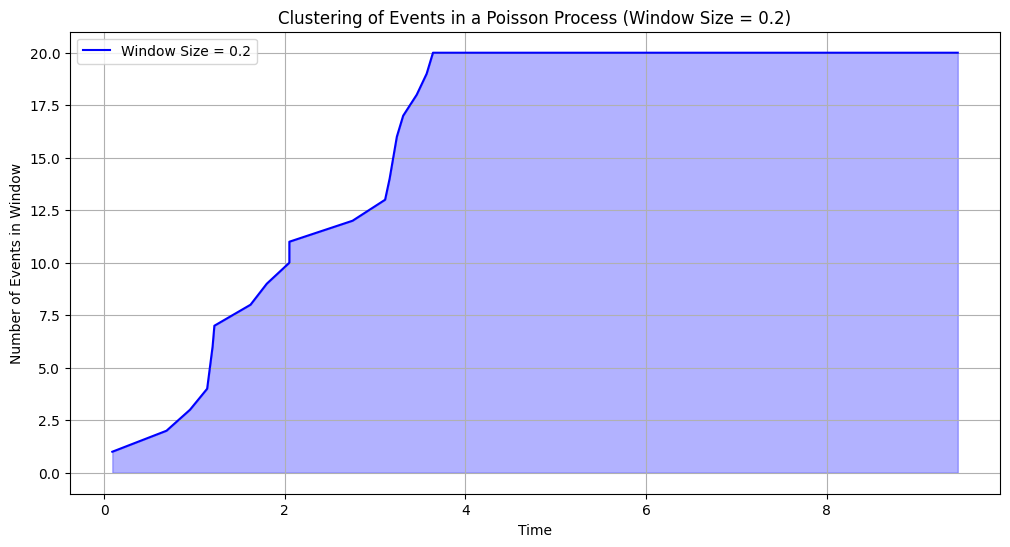

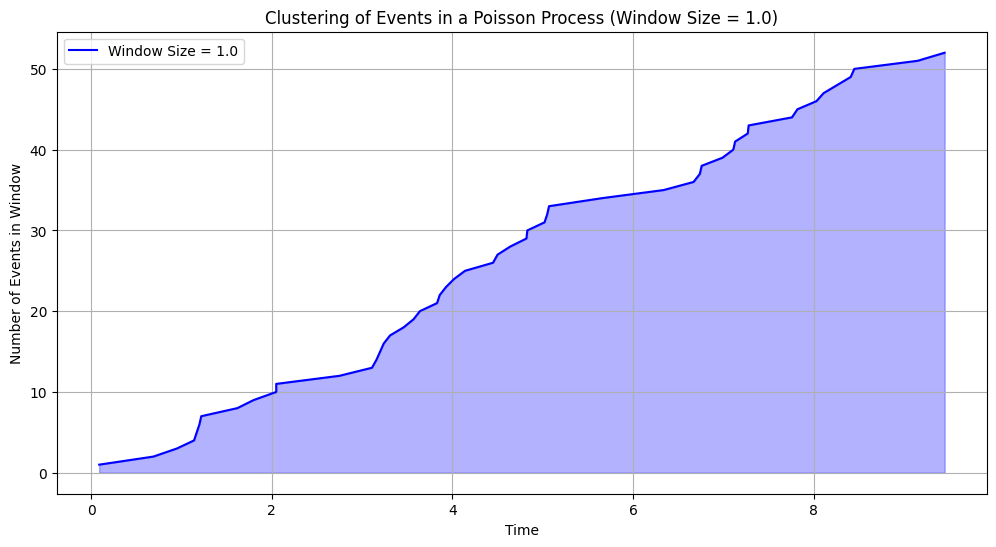

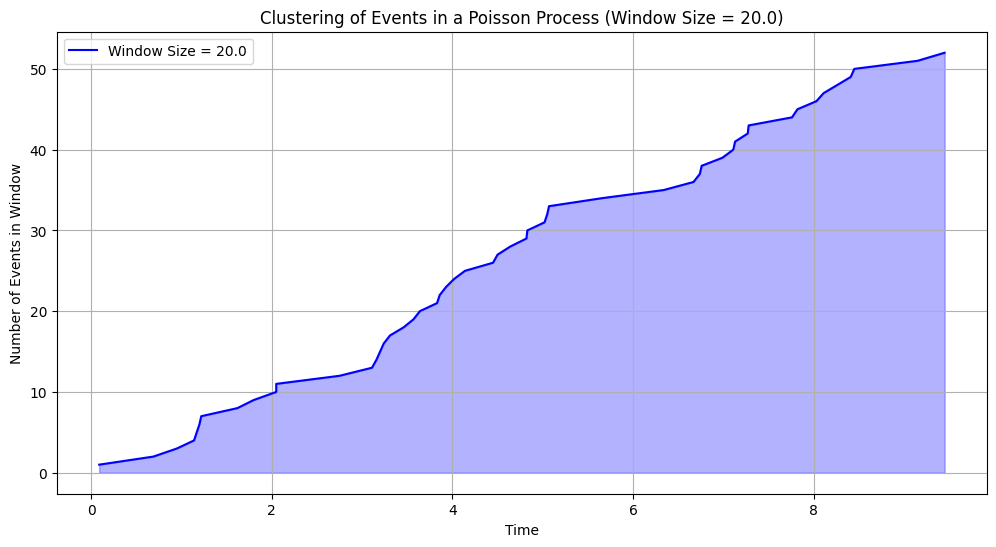

In [5]:
# Try different window sizes
window_sizes = [0.2, 1.0, 20.0]

for window_size in window_sizes:
    integer_window_size = int(window_size * resolution)
    rolling_density = time_series.rolling(window=integer_window_size, min_periods=1).sum()

    plt.figure(figsize=(12, 6))
    plt.plot(rolling_density.index / resolution, rolling_density.values, label=f'Window Size = {window_size}', color='b')
    plt.xlabel('Time')
    plt.ylabel('Number of Events in Window')
    plt.title(f'Clustering of Events in a Poisson Process (Window Size = {window_size})')
    plt.fill_between(rolling_density.index / resolution, 0, rolling_density.values, color='b', alpha=0.3)
    plt.grid(True)
    plt.legend()
    plt.show()


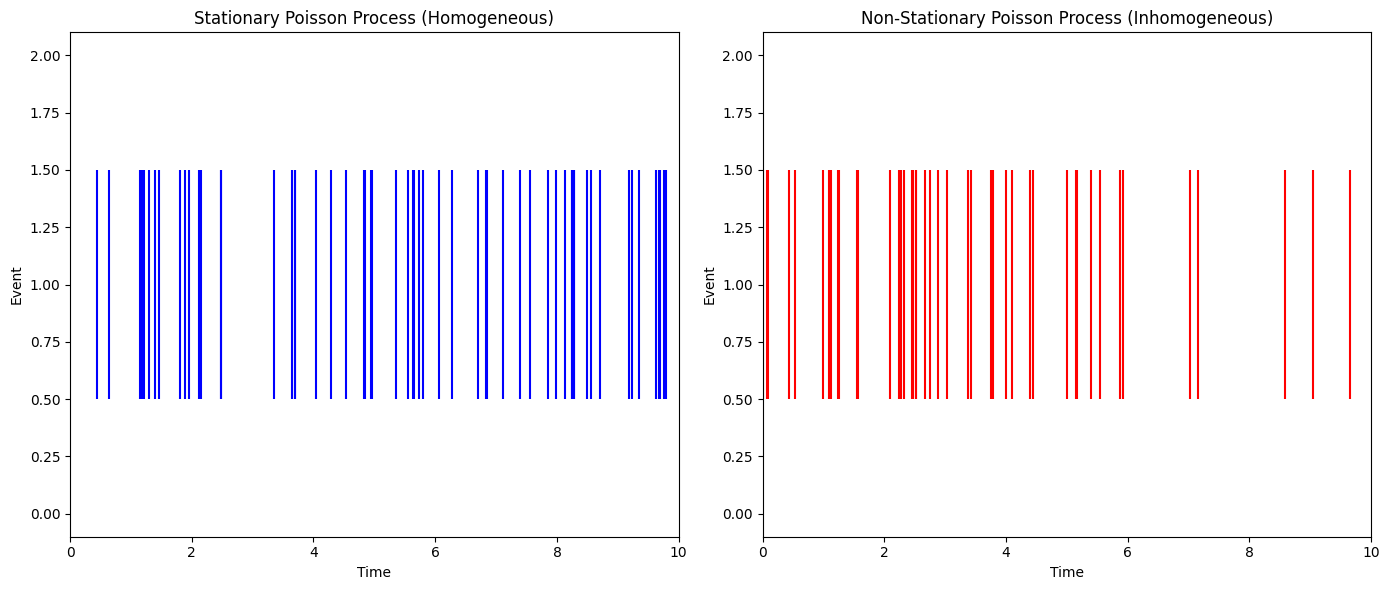

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a homogeneous Poisson process
def homogeneous_poisson_process(lam, T):
    # lam: rate (events per unit time)
    # T: time horizon
    inter_arrival_times = np.random.exponential(1 / lam, int(T * lam * 1.5))
    arrival_times = np.cumsum(inter_arrival_times)
    arrival_times = arrival_times[arrival_times <= T]
    return arrival_times

# Function to generate an inhomogeneous Poisson process
def inhomogeneous_poisson_process(lambda_t, T):
    # lambda_t: function of time, rate varies with time
    # T: time horizon
    max_lambda = max(lambda_t(np.linspace(0, T, 1000)))
    arrival_times = []
    t = 0
    while t < T:
        t += np.random.exponential(1 / max_lambda)
        if t < T and np.random.rand() < lambda_t(t) / max_lambda:
            arrival_times.append(t)
    return np.array(arrival_times)

# Define time horizon
T = 10

# Define the rate for the stationary Poisson process
lam_stationary = 5  # events per unit time

# Define a time-varying rate function for the non-stationary Poisson process
def lambda_t(t):
    return 5 + 3 * np.sin(2 * np.pi * t / T)

# Generate samples
stationary_process = homogeneous_poisson_process(lam_stationary, T)
non_stationary_process = inhomogeneous_poisson_process(lambda_t, T)

# Plotting
plt.figure(figsize=(14, 6))

# Plot for stationary Poisson process
plt.subplot(1, 2, 1)
plt.eventplot(stationary_process, color='b')
plt.title('Stationary Poisson Process (Homogeneous)')
plt.xlabel('Time')
plt.ylabel('Event')
plt.xlim(0, T)

# Plot for non-stationary Poisson process
plt.subplot(1, 2, 2)
plt.eventplot(non_stationary_process, color='r')
plt.title('Non-Stationary Poisson Process (Inhomogeneous)')
plt.xlabel('Time')
plt.ylabel('Event')
plt.xlim(0, T)

plt.tight_layout()
plt.show()


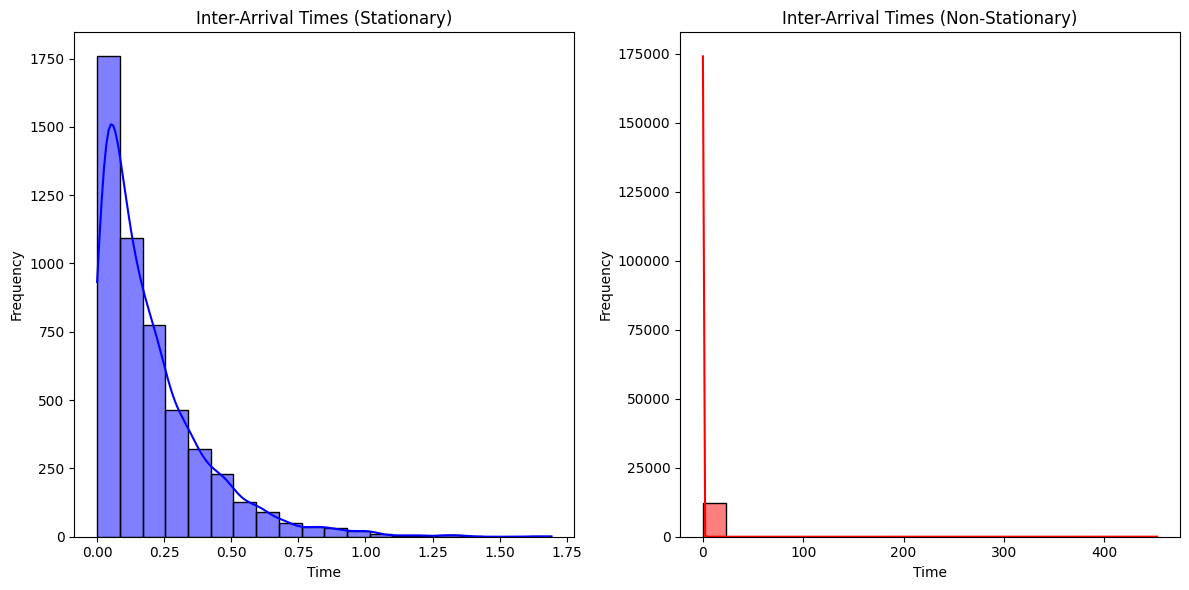

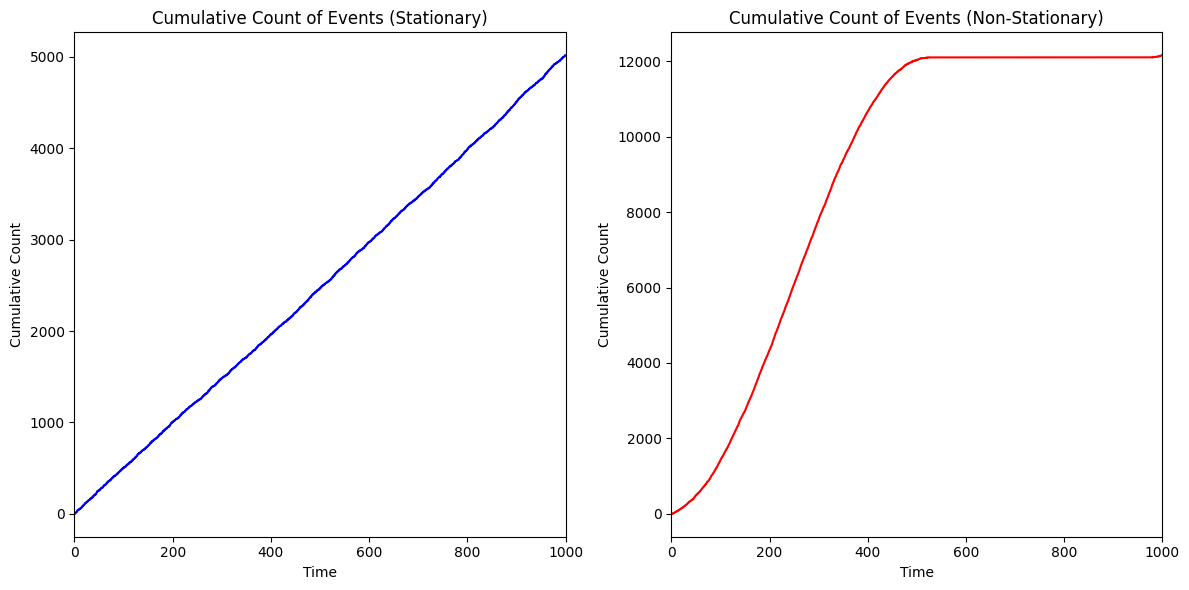

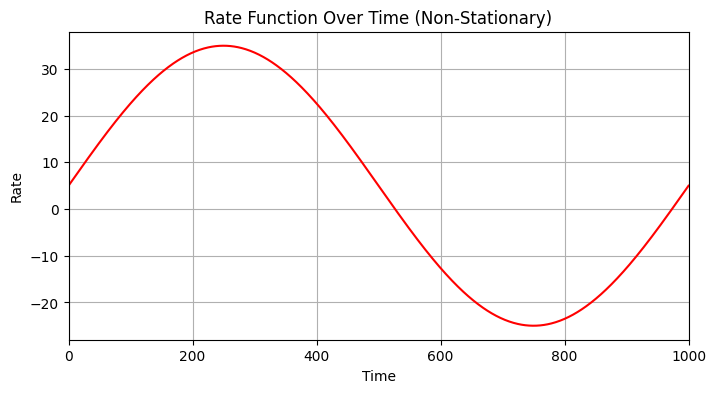

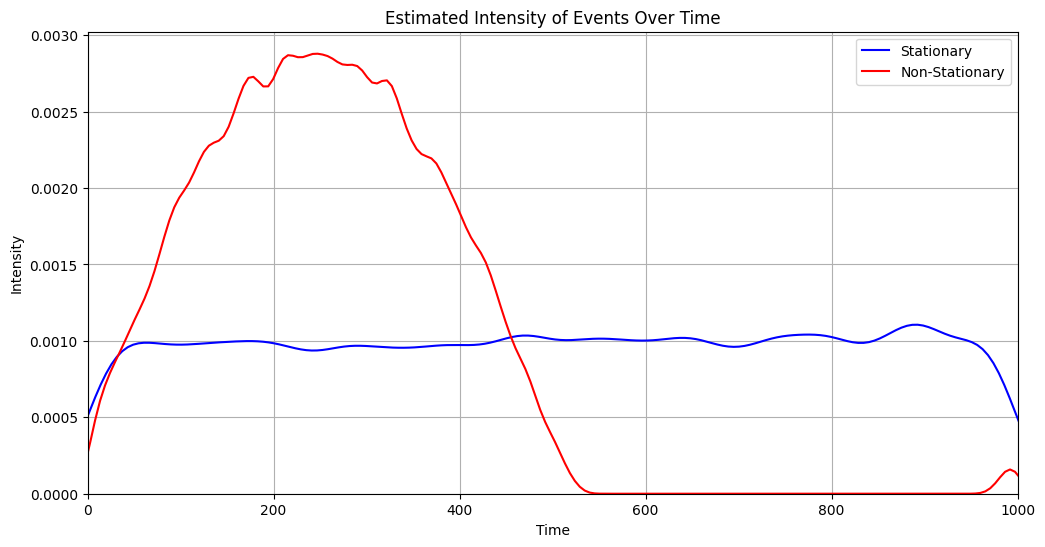

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse the existing functions for generating processes
def homogeneous_poisson_process(lam, T):
    inter_arrival_times = np.random.exponential(1 / lam, int(T * lam * 1.5))
    arrival_times = np.cumsum(inter_arrival_times)
    arrival_times = arrival_times[arrival_times <= T]
    return arrival_times

def inhomogeneous_poisson_process(lambda_t, T):
    max_lambda = max(lambda_t(np.linspace(0, T, 1000)))
    arrival_times = []
    t = 0
    while t < T:
        t += np.random.exponential(1 / max_lambda)
        if t < T and np.random.rand() < lambda_t(t) / max_lambda:
            arrival_times.append(t)
    return np.array(arrival_times)

# Define time horizon
T = 1000

# Define the rate for the stationary Poisson process
lam_stationary = 5  # events per unit time

# Define a time-varying rate function for the non-stationary Poisson process
def lambda_t(t):
    return 5 + 3 * np.sin(2 * np.pi * t / T)

# Generate samples
stationary_process = homogeneous_poisson_process(lam_stationary, T)
non_stationary_process = inhomogeneous_poisson_process(lambda_t, T)

# Calculate inter-arrival times
stationary_inter_arrival = np.diff(stationary_process)
non_stationary_inter_arrival = np.diff(non_stationary_process)

# Plot histograms of inter-arrival times
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(stationary_inter_arrival, bins=20, kde=True, color='b')
plt.title('Inter-Arrival Times (Stationary)')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(non_stationary_inter_arrival, bins=20, kde=True, color='r')
plt.title('Inter-Arrival Times (Non-Stationary)')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot cumulative count of events over time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.step(stationary_process, np.arange(1, len(stationary_process) + 1), where='post', color='b')
plt.title('Cumulative Count of Events (Stationary)')
plt.xlabel('Time')
plt.ylabel('Cumulative Count')
plt.xlim(0, T)

plt.subplot(1, 2, 2)
plt.step(non_stationary_process, np.arange(1, len(non_stationary_process) + 1), where='post', color='r')
plt.title('Cumulative Count of Events (Non-Stationary)')
plt.xlabel('Time')
plt.ylabel('Cumulative Count')
plt.xlim(0, T)

plt.tight_layout()
plt.show()

# Plot rate function for non-stationary process
time_grid = np.linspace(0, T, 1000)
rate_values = lambda_t(time_grid)

plt.figure(figsize=(8, 4))
plt.plot(time_grid, rate_values, color='r')
plt.title('Rate Function Over Time (Non-Stationary)')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.xlim(0, T)
plt.grid(True)
plt.show()

# Kernel density estimation for event intensity over time
plt.figure(figsize=(12, 6))

sns.kdeplot(stationary_process, bw_adjust=0.5, color='b', label='Stationary')
sns.kdeplot(non_stationary_process, bw_adjust=0.5, color='r', label='Non-Stationary')
plt.title('Estimated Intensity of Events Over Time')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.xlim(0, T)
plt.legend()
plt.grid(True)
plt.show()


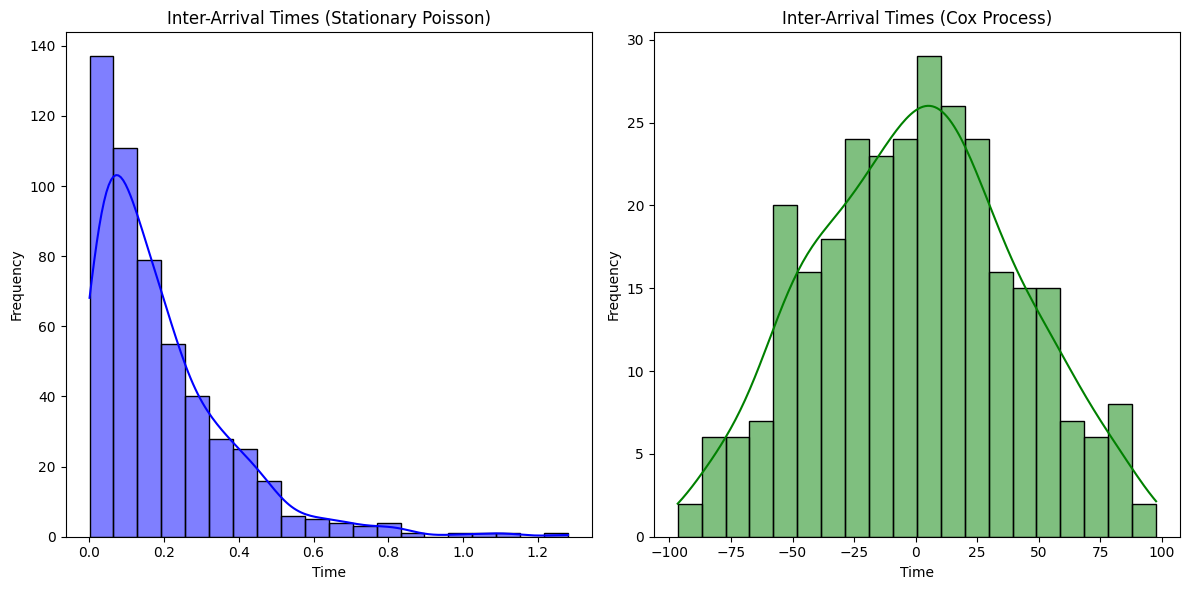

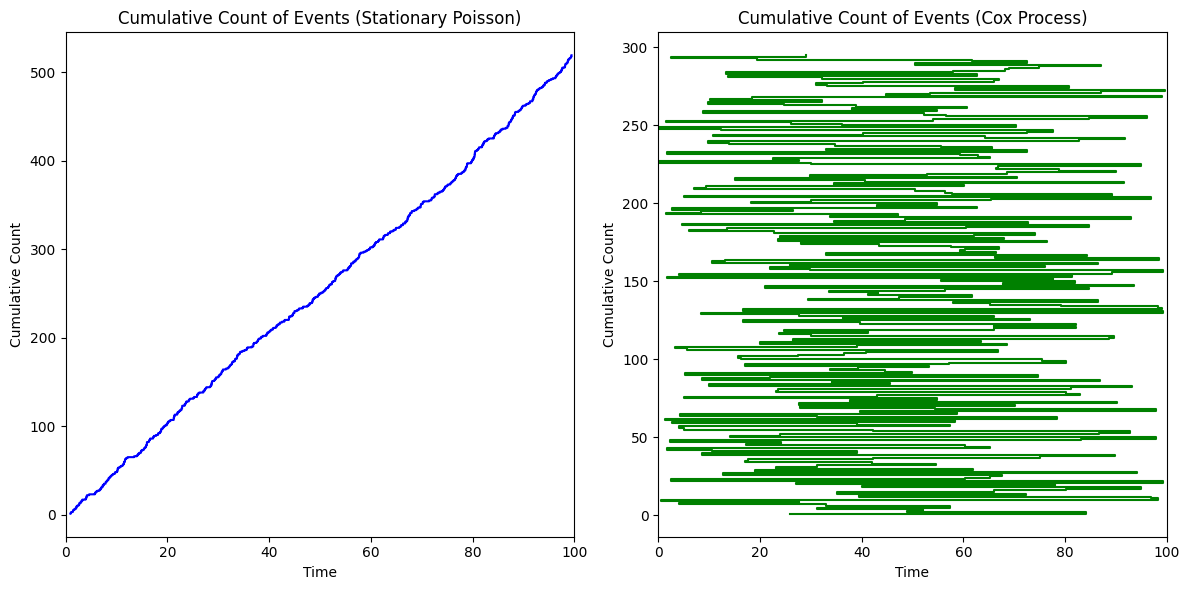

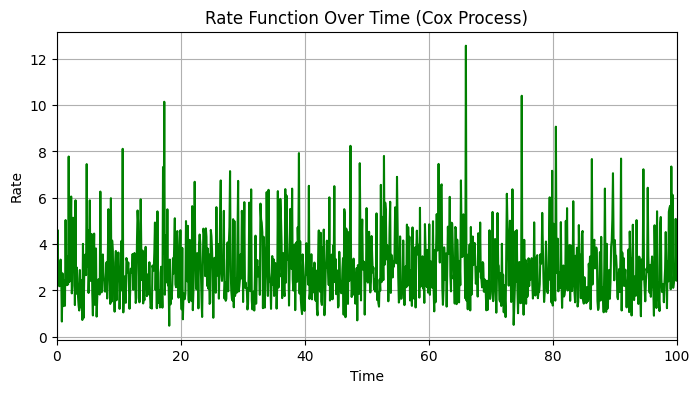

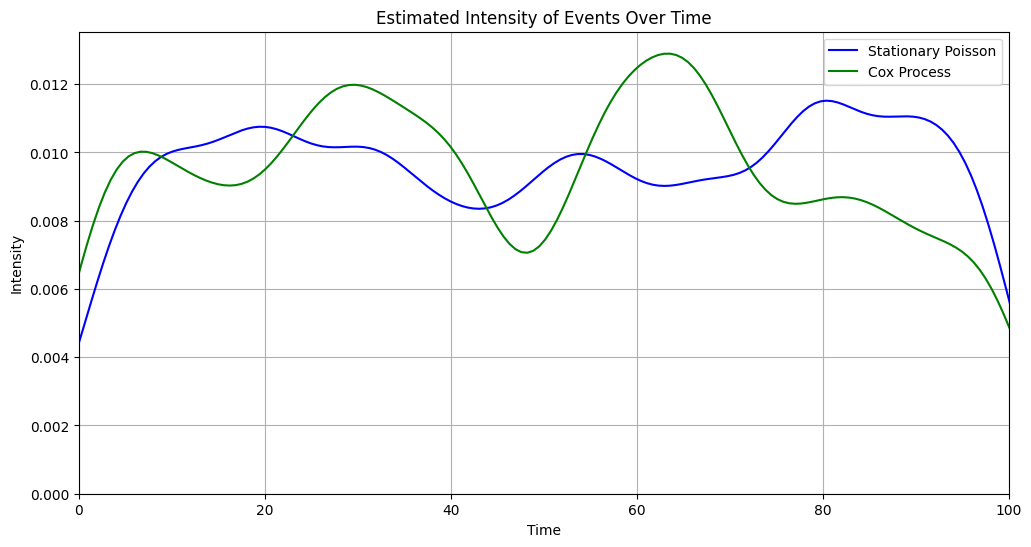

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Function to generate a Cox process using a Gaussian process for the rate
def cox_process(mu, sigma, T, points=1000):
    """
    mu: Mean of the Gaussian process.
    sigma: Standard deviation of the Gaussian process.
    T: Time horizon.
    points: Number of points to simulate the Gaussian process.
    """
    # Time grid
    time_grid = np.linspace(0, T, points)
    
    # Generate Gaussian process for the rate
    rate = np.random.normal(mu, sigma, points)
    rate = np.exp(rate)  # Exponentiate to ensure positivity

    # Integrate rate over time to get the expected number of events
    intensity = np.cumsum(rate) * (T / points)
    
    # Generate event times using the integrated intensity
    total_events = np.random.poisson(intensity[-1])
    uniform_times = np.random.uniform(0, 1, total_events)
    event_times = np.interp(uniform_times, intensity / intensity[-1], time_grid)
    
    return event_times, rate, time_grid

# Define parameters
T = 100
lam_stationary = 5

# Gaussian process parameters for Cox process
mu_cox = 1
sigma_cox = 0.5

# Generate processes
stationary_process = homogeneous_poisson_process(lam_stationary, T)
cox_event_times, cox_rate, cox_time_grid = cox_process(mu_cox, sigma_cox, T)

# Calculate inter-arrival times
stationary_inter_arrival = np.diff(stationary_process)
cox_inter_arrival = np.diff(cox_event_times)

# Plot histograms of inter-arrival times
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(stationary_inter_arrival, bins=20, kde=True, color='b')
plt.title('Inter-Arrival Times (Stationary Poisson)')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(cox_inter_arrival, bins=20, kde=True, color='g')
plt.title('Inter-Arrival Times (Cox Process)')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot cumulative count of events over time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.step(stationary_process, np.arange(1, len(stationary_process) + 1), where='post', color='b')
plt.title('Cumulative Count of Events (Stationary Poisson)')
plt.xlabel('Time')
plt.ylabel('Cumulative Count')
plt.xlim(0, T)

plt.subplot(1, 2, 2)
plt.step(cox_event_times, np.arange(1, len(cox_event_times) + 1), where='post', color='g')
plt.title('Cumulative Count of Events (Cox Process)')
plt.xlabel('Time')
plt.ylabel('Cumulative Count')
plt.xlim(0, T)

plt.tight_layout()
plt.show()

# Plot rate function for Cox process
plt.figure(figsize=(8, 4))
plt.plot(cox_time_grid, cox_rate, color='g')
plt.title('Rate Function Over Time (Cox Process)')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.xlim(0, T)
plt.grid(True)
plt.show()

# Kernel density estimation for event intensity over time
plt.figure(figsize=(12, 6))

sns.kdeplot(stationary_process, bw_adjust=0.5, color='b', label='Stationary Poisson')
sns.kdeplot(cox_event_times, bw_adjust=0.5, color='g', label='Cox Process')
plt.title('Estimated Intensity of Events Over Time')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.xlim(0, T)
plt.legend()
plt.grid(True)
plt.show()
